In [1]:
import tensorflow as tf

# Check for GPU availability
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    print("The notebook is running on the following GPU(s):")
    for gpu in gpus:
        print(gpu)
else:
    print("The notebook is not running on a GPU.")


2024-08-19 03:00:39.964437: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-19 03:00:39.994663: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


The notebook is running on the following GPU(s):
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [2]:
!pip install segmentation-models-3D==1.0.7
!pip install scikit-image
!pip install sklearn-model

# Install system dependencies
!apt-get update && apt-get install -y libgl1-mesa-glx libglib2.0-0

# Install OpenCV and Matplotlib
!pip install opencv-python-headless matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 41.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 38.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 34.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.4/315.4 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.9/220.9 kB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 30.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 70.4 MB/s eta 0:00:0000:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 31.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301

Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libbsd0 amd64 0.10.0-1 [45.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libglib2.0-bin amd64 2.64.6-1~ubuntu20.04.7 [72.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libglib2.0-0 amd64 2.64.6-1~ubuntu20.04.7 [1289 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libdrm-common all 2.4.107-8ubuntu1~20.04.2 [5396 B]
Get:5 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libdrm2 amd64 2.4.107-8ubuntu1~20.04.2 [34.1 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal/main amd64 libedit2 amd64 3.1-20191231-1 [87.0 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal/main amd64 libxau6 amd64 1:1.0.9-0ubuntu1 [7488 B]
Get:8 http://archive.ubuntu.com/ubuntu focal/main amd64 libxdmcp6 amd64 1:1.1.3-0ubuntu1 [10.6 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal/main amd64 libxcb1 amd64 1.14-2 [44.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libx1

Selecting previously unselected package libsensors5:amd64.
Preparing to unpack .../20-libsensors5_1%3a3.6.0-2ubuntu1.1_amd64.deb ...
Unpacking libsensors5:amd64 (1:3.6.0-2ubuntu1.1) ...
Selecting previously unselected package libvulkan1:amd64.
Preparing to unpack .../21-libvulkan1_1.2.131.2-1_amd64.deb ...
Unpacking libvulkan1:amd64 (1.2.131.2-1) ...
Selecting previously unselected package libgl1-mesa-dri:amd64.
Preparing to unpack .../22-libgl1-mesa-dri_21.2.6-0ubuntu0.1~20.04.2_amd64.deb ...
Unpacking libgl1-mesa-dri:amd64 (21.2.6-0ubuntu0.1~20.04.2) ...
Selecting previously unselected package libglvnd0:amd64.
Preparing to unpack .../23-libglvnd0_1.3.2-1~ubuntu0.20.04.2_amd64.deb ...
Unpacking libglvnd0:amd64 (1.3.2-1~ubuntu0.20.04.2) ...
Selecting previously unselected package libx11-xcb1:amd64.
Preparing to unpack .../24-libx11-xcb1_2%3a1.6.9-2ubuntu1.6_amd64.deb ...
Unpacking libx11-xcb1:amd64 (2:1.6.9-2ubuntu1.6) ...
Selecting previously unselected package libxcb-dri2-0:amd64.
Pr

In [3]:
import numpy as np
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import segmentation_models_3D as sm
from tensorflow.keras.optimizers import Adam
import imageio
from IPython.display import display, Image

# Define paths to directories
frames_dir = "/media/ssd/mayur/media/ssd/mayur/ecocardiography/standardized_frames_2/"
masks_dir = "/media/ssd/mayur/media/ssd/mayur/ecocardiography/standardized_masks_2/"

# Function to recursively get all image files from a directory
def get_image_files(directory, extension='.jpg'):
    image_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(extension):
                image_files.append(os.path.join(root, file))
    return sorted(image_files)

# Custom Dataset class with sequence grouping
class CustomDataset(tf.data.Dataset):
    def _generator(frame_files, mask_files, num_frames_per_sequence=32, target_size=(256, 256)):
        num_sequences = len(frame_files) // num_frames_per_sequence
        for i in range(num_sequences):
            frames = []
            masks = []
            for j in range(num_frames_per_sequence):
                frame_file = frame_files[i * num_frames_per_sequence + j]
                mask_file = mask_files[i * num_frames_per_sequence + j]
                
                # Convert bytes to string if necessary
                if isinstance(frame_file, bytes):
                    frame_file = frame_file.decode('utf-8')
                if isinstance(mask_file, bytes):
                    mask_file = mask_file.decode('utf-8')

                frame = cv2.imread(frame_file, cv2.IMREAD_GRAYSCALE)
                mask = cv2.imread(mask_file, cv2.IMREAD_GRAYSCALE)

                frame = cv2.resize(frame, target_size)
                mask = cv2.resize(mask, target_size)

                frame = frame / 255.0
                mask = mask / 255.0

                frame = np.expand_dims(frame, axis=-1)
                mask = np.expand_dims(mask, axis=-1)

                frames.append(frame)
                masks.append(mask)

            yield np.array(frames), np.array(masks)

    def __new__(cls, frame_files, mask_files):
        return tf.data.Dataset.from_generator(
            cls._generator,
            output_signature=(
                tf.TensorSpec(shape=(32, 256, 256, 1), dtype=tf.float32),
                tf.TensorSpec(shape=(32, 256, 256, 1), dtype=tf.float32)
            ),
            args=(frame_files, mask_files)
        )



Segmentation Models: using `tf.keras` framework.


In [4]:
# Load the image and mask files
frame_files = get_image_files(frames_dir, extension='.jpg')
mask_files = get_image_files(masks_dir, extension='.png')

# Instantiate the dataset
dataset = CustomDataset(frame_files, mask_files)

# Define the iterator
iterator = iter(dataset)

# Example of using __getitem__
image, mask = next(iterator)
print("Image shape:", image.shape)
print("Mask shape:", mask.shape)


2024-08-19 03:01:40.210140: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22279 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:16:00.0, compute capability: 8.9


Image shape: (32, 256, 256, 1)
Mask shape: (32, 256, 256, 1)


In [5]:
# Define the model using segmentation_models_3D
def get_unet_model(input_shape, learning_rate=0.001):
    BACKBONE = 'resnet18'
    preprocess_input = sm.get_preprocessing(BACKBONE)

    # Define the model
    model = sm.Unet(BACKBONE, input_shape=input_shape, classes=1, encoder_weights=None)
    
    # Compile the model
    optim = Adam(learning_rate=learning_rate)
    loss_to_use = sm.losses.bce_jaccard_loss
    model.compile(optimizer=optim, loss=loss_to_use, metrics=[sm.metrics.iou_score, sm.metrics.f1_score])
    
    return model

# Check the input shape
input_shape = (32, 256, 256, 1)  # Adjust this if needed
print(f"Input shape: {input_shape}")

# Get the model
model = get_unet_model(input_shape)


Input shape: (32, 256, 256, 1)


Number of sequences: 109
Train dataset size: 76
Validation dataset size: 16
Test dataset size: 17


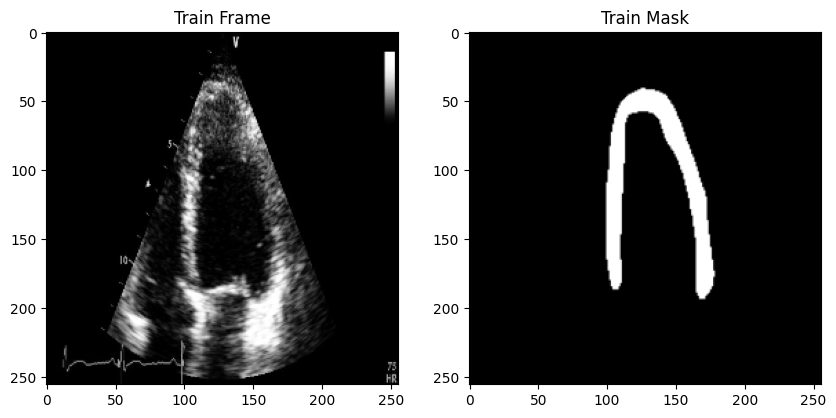

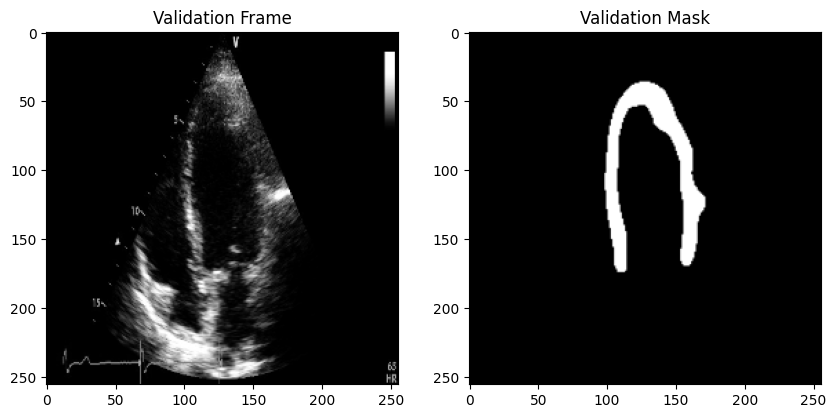

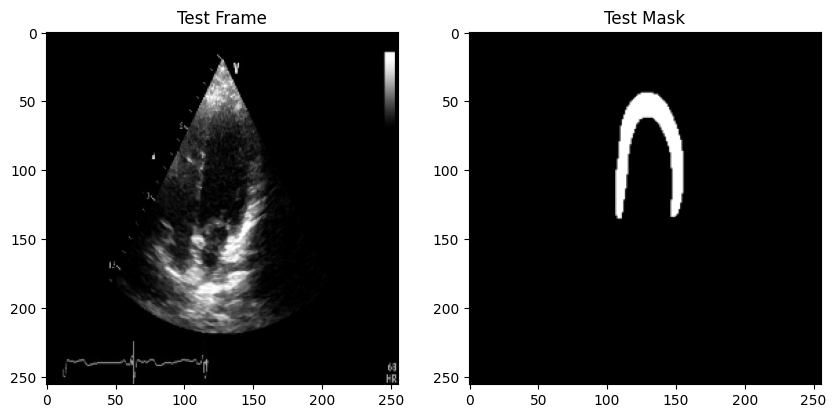

In [6]:
# Create datasets using the custom data loader
batch_size = 1  # Set your desired batch size here
full_dataset = CustomDataset(frame_files, mask_files).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
num_sequences = len(frame_files) // 32

train_size = int(0.7 * num_sequences)
val_size = int(0.15 * num_sequences)
test_size = num_sequences - train_size - val_size

# Ensure correct splitting before batching
train_dataset = full_dataset.take(train_size).batch(batch_size)
remaining_dataset = full_dataset.skip(train_size)
val_dataset = remaining_dataset.take(val_size).batch(batch_size)
test_dataset = remaining_dataset.skip(val_size).take(test_size).batch(batch_size)

# Print sizes of datasets for debugging
print(f"Number of sequences: {num_sequences}")
print(f"Train dataset size: {train_size}")
print(f"Validation dataset size: {val_size}")
print(f"Test dataset size: {test_size}")

# Plot sample data
def plot_sample_data(data, labels, title):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(data[0, 0, :, :, 0], cmap='gray')
    axes[0].set_title(f'{title} Frame')
    axes[1].imshow(labels[0, 0, :, :, 0], cmap='gray')
    axes[1].set_title(f'{title} Mask')
    plt.show()

# Convert datasets to numpy arrays for plotting
def get_one_batch(dataset):
    for data, labels in dataset.take(1):
        return data.numpy(), labels.numpy()
    return None, None

# Get one batch from each dataset
train_data_np, train_labels_np = get_one_batch(train_dataset)
val_data_np, val_labels_np = get_one_batch(val_dataset)
test_data_np, test_labels_np = get_one_batch(test_dataset)

# Check if datasets contain data
if train_data_np is not None:
    plot_sample_data(train_data_np, train_labels_np, 'Train')
else:
    print("Train dataset is empty.")

if val_data_np is not None:
    plot_sample_data(val_data_np, val_labels_np, 'Validation')
else:
    print("Validation dataset is empty.")

if test_data_np is not None:
    plot_sample_data(test_data_np, test_labels_np, 'Test')
else:
    print("Test dataset is empty.")


Epoch 1/100


2024-08-19 03:01:52.579794: I tensorflow/core/grappler/optimizers/generic_layout_optimizer.cc:403] Cancel Transpose nodes around Pad: transpose_before=model_1/bn_data/FusedBatchNormV3-0-1-TransposeNCDHWToNDHWC-LayoutOptimizer pad=model_1/zero_padding3d/Pad transpose_after=model_1/conv0/Conv3D-0-TransposeNDHWCToNCDHW-LayoutOptimizer,gradient_tape/model_1/conv0/Conv3D/Conv3DBackpropFilterV2-0-TransposeNDHWCToNCDHW-LayoutOptimizer,gradient_tape/model_1/conv0/Conv3D/ShapeN-0-TransposeNDHWCToNCDHW-LayoutOptimizer
2024-08-19 03:01:54.728992: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-08-19 03:01:56.831011: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7efff337be10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-19 03:01:56.831053: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-08-19 03:01:56.

     76/Unknown - 20s 68ms/step - loss: 0.6755 - iou_score: 0.4219 - f1-score: 0.5605

2024-08-19 03:02:13.012181: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


76/76 [==============================] - 26s 145ms/step - loss: 0.6755 - iou_score: 0.4219 - f1-score: 0.5605 - val_loss: 149.1853 - val_iou_score: 0.0267 - val_f1-score: 0.0519
Epoch 2/100


2024-08-19 03:02:14.963789: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 2454232336009845663
2024-08-19 03:02:14.963834: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 18112251761072067943
2024-08-19 03:02:14.963859: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 8047662681908814068


76/76 [==============================] - 9s 117ms/step - loss: 0.3931 - iou_score: 0.6508 - f1-score: 0.7871 - val_loss: 2.0521 - val_iou_score: 0.1263 - val_f1-score: 0.2237
Epoch 3/100
76/76 [==============================] - 9s 116ms/step - loss: 0.3377 - iou_score: 0.6994 - f1-score: 0.8224 - val_loss: 0.7146 - val_iou_score: 0.4082 - val_f1-score: 0.5766
Epoch 4/100
76/76 [==============================] - 9s 114ms/step - loss: 0.3109 - iou_score: 0.7230 - f1-score: 0.8384 - val_loss: 0.4773 - val_iou_score: 0.5949 - val_f1-score: 0.7449
Epoch 5/100
76/76 [==============================] - 9s 116ms/step - loss: 0.2881 - iou_score: 0.7426 - f1-score: 0.8516 - val_loss: 0.3555 - val_iou_score: 0.6907 - val_f1-score: 0.8159
Epoch 6/100
76/76 [==============================] - 9s 116ms/step - loss: 0.2742 - iou_score: 0.7549 - f1-score: 0.8597 - val_loss: 0.3343 - val_iou_score: 0.7108 - val_f1-score: 0.8299
Epoch 7/100
76/76 [==============================] - 9s 116ms/step - loss: 0.

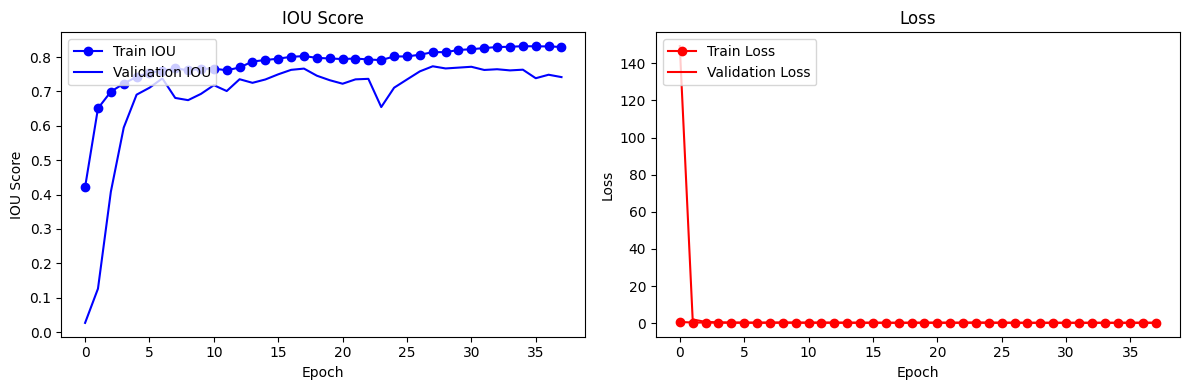

In [7]:
# Custom callback to plot accuracy and loss after each epoch
class PlotTraining(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.train_iou = []
        self.val_iou = []
        self.train_loss = []
        self.val_loss = []
        self.epochs = []
        
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        self.train_iou.append(logs.get('iou_score'))
        self.val_iou.append(logs.get('val_iou_score'))
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.epochs.append(epoch)

    def on_train_end(self, logs=None):
        fig, ax = plt.subplots(1, 2, figsize=(12, 4))
        ax[0].plot(self.epochs, self.train_iou, 'bo-', label='Train IOU')
        ax[0].plot(self.epochs, self.val_iou, 'b-', label='Validation IOU')
        ax[0].set_title('IOU Score')
        ax[0].set_xlabel('Epoch')
        ax[0].set_ylabel('IOU Score')
        ax[0].legend(loc='upper left')
        
        ax[1].plot(self.epochs, self.train_loss, 'ro-', label='Train Loss')
        ax[1].plot(self.epochs, self.val_loss, 'r-', label='Validation Loss')
        ax[1].set_title('Loss')
        ax[1].set_xlabel('Epoch')
        ax[1].set_ylabel('Loss')
        ax[1].legend(loc='upper left')
        
        plt.tight_layout()
        plt.show()

# Callbacks
plot_training_cb = PlotTraining()
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)  # Uncomment if needed

# Train the model
epochs = 100

history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=val_dataset,
#     callbacks=[plot_training_cb]  # Add early_stopping_cb here if needed
    callbacks=[plot_training_cb, early_stopping_cb]  # Uncomment this line to use early stopping
)




In [8]:
# Evaluate the model
test_loss, test_iou, test_f1 = model.evaluate(test_dataset)
print(f"Test loss: {test_loss}")
print(f"Test IOU: {test_iou}")
print(f"Test F1 score: {test_f1}")


17/17 [==============================] - 4s 46ms/step - loss: 0.3183 - iou_score: 0.7240 - f1-score: 0.8381
Test loss: 0.3182755708694458
Test IOU: 0.7239851951599121
Test F1 score: 0.8381100296974182


2024-08-19 03:07:43.499150: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 2454232336009845663
2024-08-19 03:07:43.499180: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 18112251761072067943
2024-08-19 03:07:43.499189: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous recv item cancelled. Key hash: 8047662681908814068


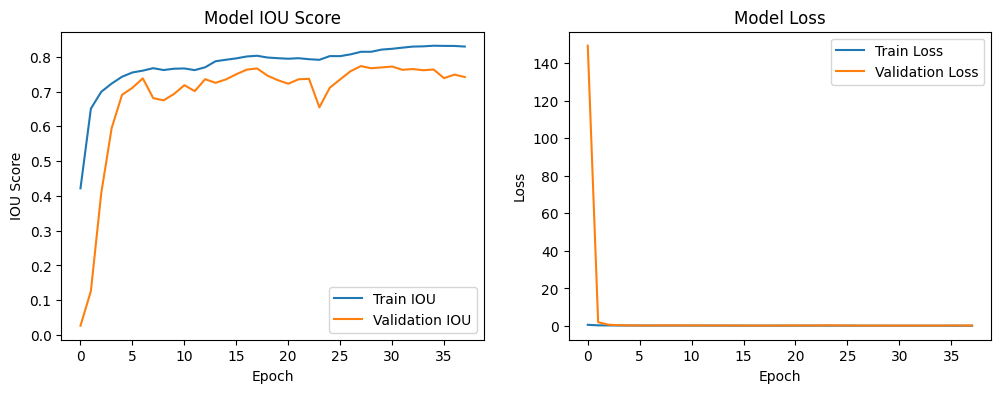

In [9]:
# Plot final training & validation IOU values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['iou_score'], label='Train IOU')
plt.plot(history.history['val_iou_score'], label='Validation IOU')
plt.title('Model IOU Score')
plt.xlabel('Epoch')
plt.ylabel('IOU Score')
plt.legend()

# Plot final training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


1/1 [==============================] - 0s 337ms/step


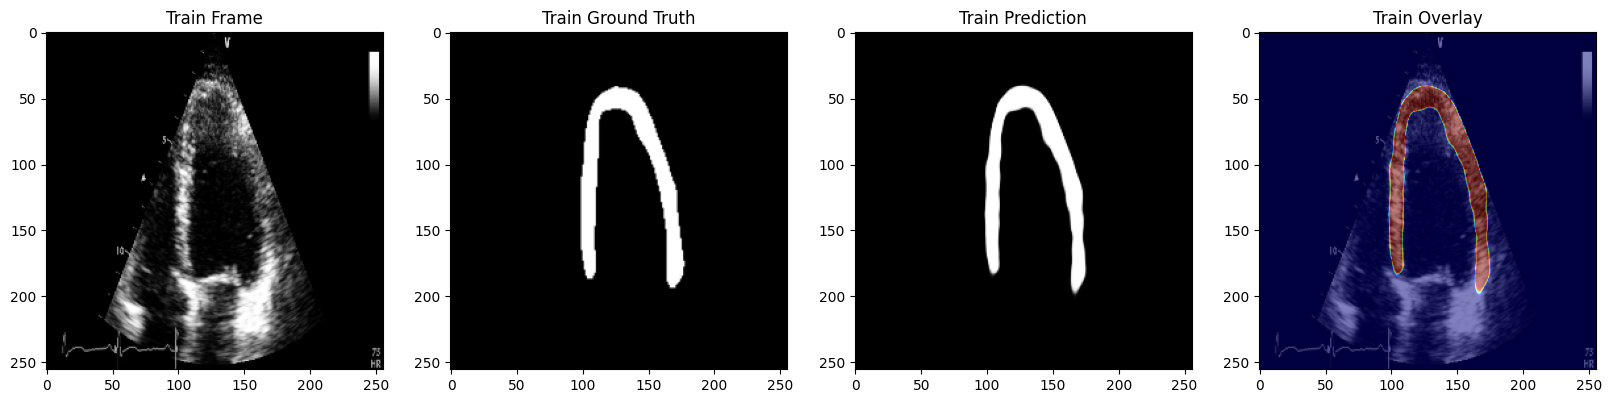

1/1 [==============================] - 0s 20ms/step


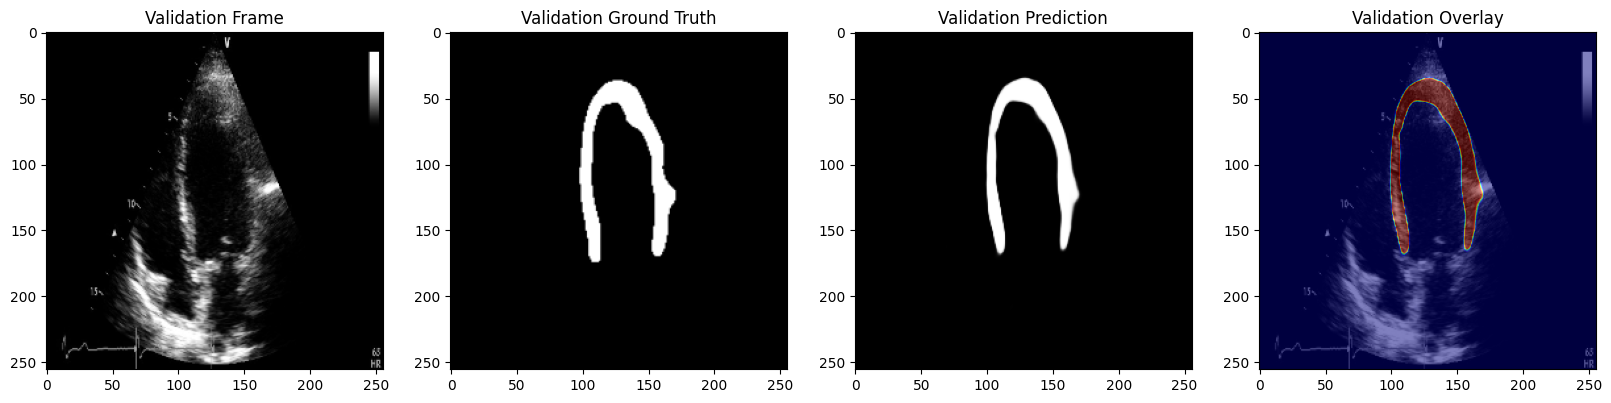

1/1 [==============================] - 0s 19ms/step


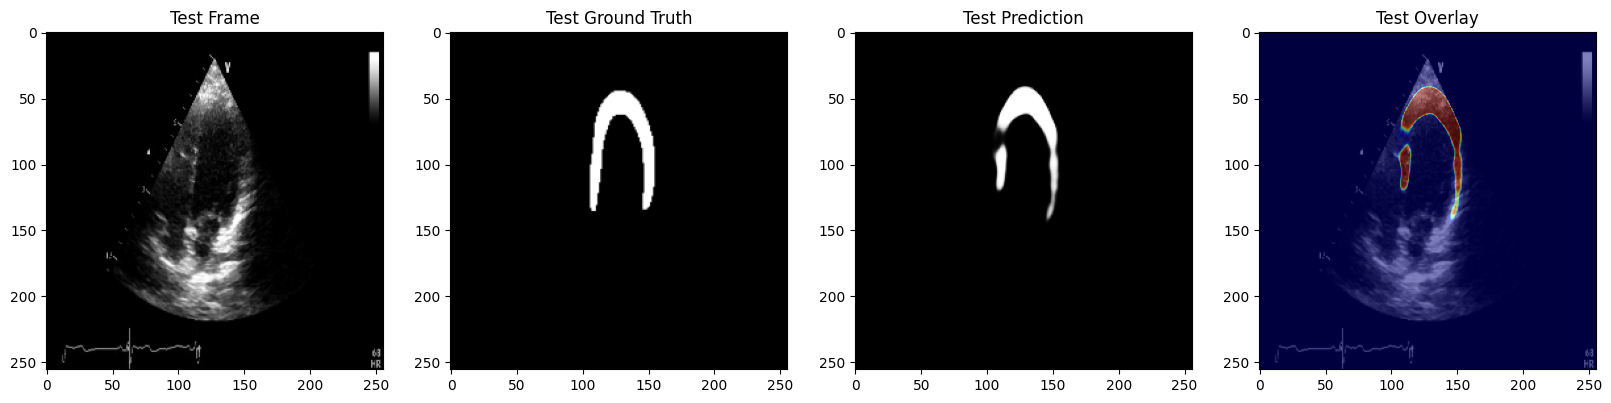

In [10]:
# Function to visualize predictions along with ground truth
def plot_prediction(data, labels, model, title):
    predictions = model.predict(data)
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].imshow(data[0, 0, :, :, 0], cmap='gray')
    axes[0].set_title(f'{title} Frame')
    axes[1].imshow(labels[0, 0, :, :, 0], cmap='gray')
    axes[1].set_title(f'{title} Ground Truth')
    axes[2].imshow(predictions[0, 0, :, :, 0], cmap='gray')
    axes[2].set_title(f'{title} Prediction')
    axes[3].imshow(data[0, 0, :, :, 0], cmap='gray')
    axes[3].imshow(predictions[0, 0, :, :, 0], cmap='jet', alpha=0.5)
#     axes[3].imshow(labels[0, 0, :, :, 0], cmap='jet', alpha=0.5)  # Overlay Ground Truth instead of Prediction
    axes[3].set_title(f'{title} Overlay')
    plt.show()

# Plot predictions for random images from train, validation, and test sets
plot_prediction(train_data_np, train_labels_np, model, 'Train')
plot_prediction(val_data_np, val_labels_np, model, 'Validation')
plot_prediction(test_data_np, test_labels_np, model, 'Test')


1/1 [==============================] - 0s 20ms/step


/tmp/ipykernel_32/1851421483.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(temp_filename))


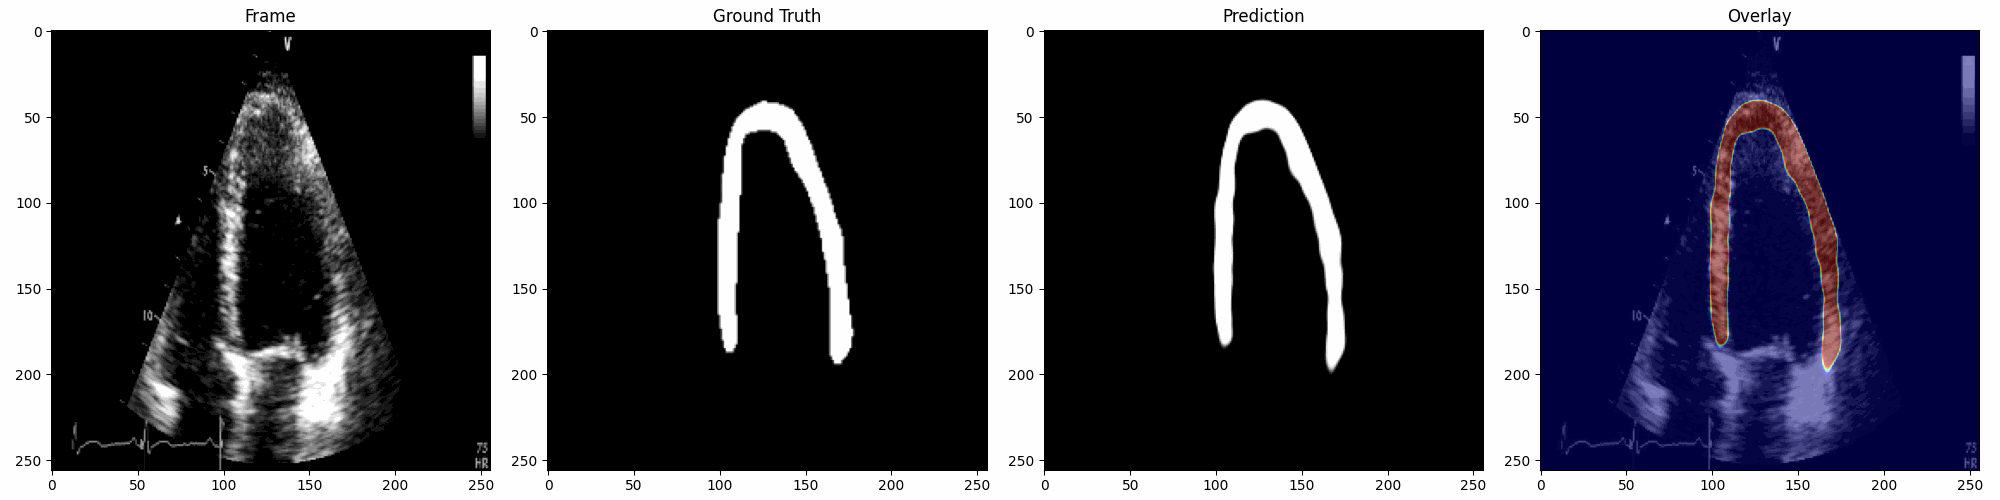

1/1 [==============================] - 0s 21ms/step


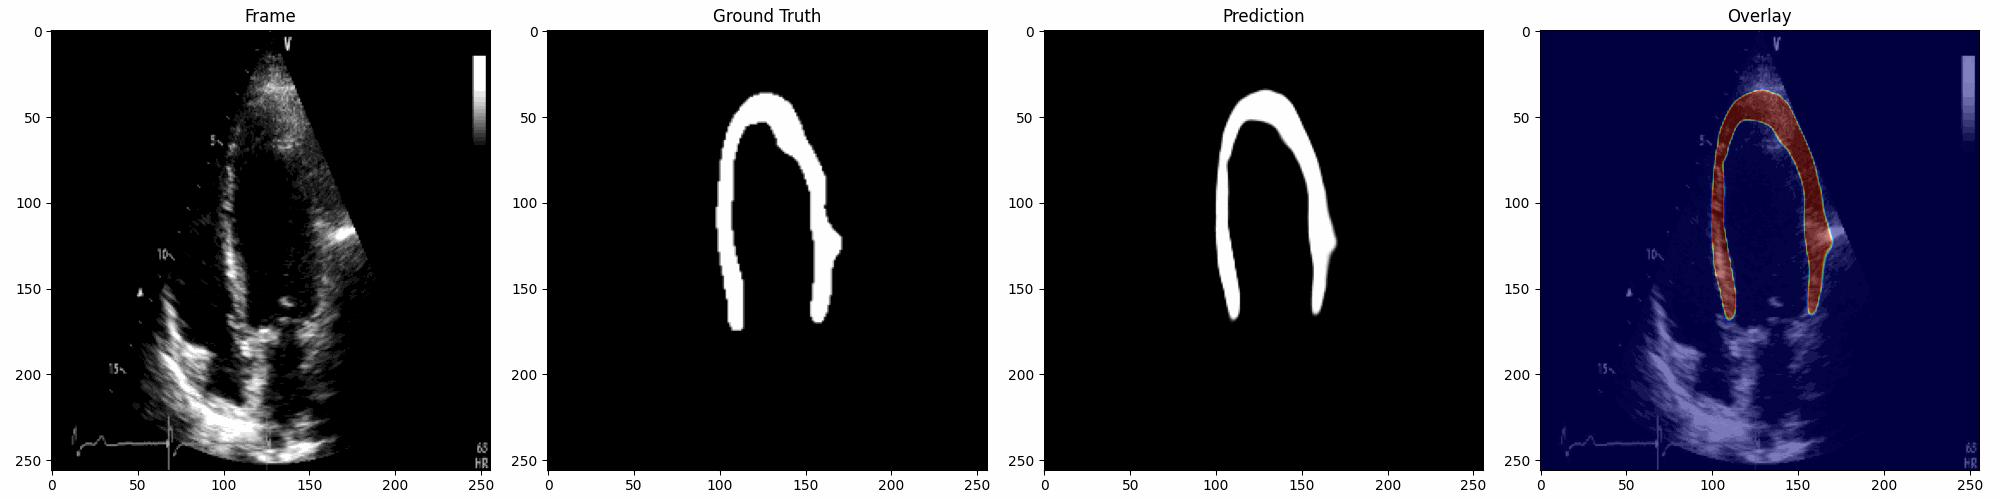

1/1 [==============================] - 0s 20ms/step


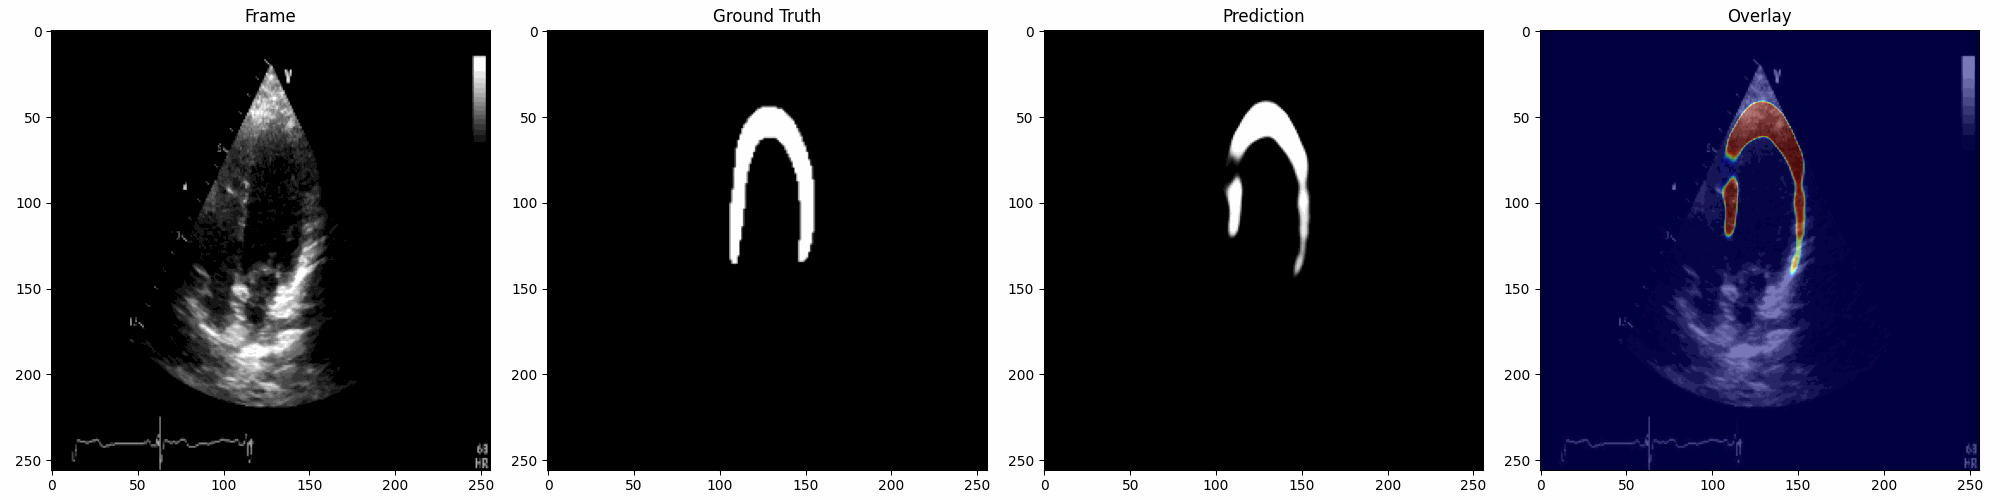

In [14]:
import imageio
from IPython.display import display, Image

def create_gif_from_video(data, labels, model, gif_filename='output.gif'):
    predictions = model.predict(data)
    
    frames = []
    for i in range(data.shape[1]):
        fig, axes = plt.subplots(1, 4, figsize=(20, 5))
        axes[0].imshow(data[0, i, :, :, 0], cmap='gray')
        axes[0].set_title('Frame')
        axes[1].imshow(labels[0, i, :, :, 0], cmap='gray')
        axes[1].set_title('Ground Truth')
        axes[2].imshow(predictions[0, i, :, :, 0], cmap='gray')
        axes[2].set_title('Prediction')
        axes[3].imshow(data[0, i, :, :, 0], cmap='gray')
        axes[3].imshow(predictions[0, i, :, :, 0], cmap='jet', alpha=0.5)
#         axes[3].imshow(labels[0, i, :, :, 0], cmap='jet', alpha=0.5)  # Overlay Ground Truth instead of Prediction
        axes[3].set_title('Overlay')
        
        plt.tight_layout()
        # Save the figure to a temporary file
        temp_filename = f'temp_frame_{i}.png'
        plt.savefig(temp_filename)
        plt.close(fig)
        
        # Read the temporary file and append to the frames list
        frames.append(imageio.imread(temp_filename))
        
        # Remove the temporary file
        os.remove(temp_filename)
    
    # Save the frames as a gif with an infinite loop
    imageio.mimsave(gif_filename, frames, duration=0.5, loop=0)  # Adjust duration as needed
    
    # Display the GIF in the notebook
    with open(gif_filename, "rb") as f:
        display(Image(data=f.read(), format='gif'))  # Ensure format is 'gif'

# Convert one video from the test dataset to a gif and display it in the notebook
create_gif_from_video(train_data_np, train_labels_np, model, gif_filename='train_video_output.gif')
create_gif_from_video(val_data_np, val_labels_np, model, gif_filename='val_video_output.gif')
create_gif_from_video(test_data_np, test_labels_np, model, gif_filename='test_video_output.gif')
